In [14]:
import statistics
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [15]:
df_vote_average = pd.read_csv("/Users/iris/Desktop/GR5291Group8-master/Data/cleaned_movie_data_vote_average.csv")

In [16]:
Y_vote_average = df_vote_average[df_vote_average.columns[0]]
X_vote_average = df_vote_average[df_vote_average.columns[1:len(Y_vote_average)+1]]

In [17]:
# split data into training data 75%, test data 25%
seed = 123
test_size = 0.25
X_vote_average_train, X_vote_average_test, y_vote_average_train, y_vote_average_test = train_test_split(X_vote_average, Y_vote_average, test_size=test_size, random_state=seed)

In [18]:
# tune parameters
model = RandomForestRegressor()
n_estimators = [50, 100, 150, 200]
max_depth = [3, 5, 7, 9, 11]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
grid_search = GridSearchCV(model, param_grid, scoring="neg_mean_squared_error", cv=5, n_jobs = -1)
grid_result = grid_search.fit(X_vote_average_train, y_vote_average_train)

In [20]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -0.352187 using {'max_depth': 11, 'n_estimators': 200}


-0.451823 (0.014535) with: {'max_depth': 3, 'n_estimators': 50}
-0.450992 (0.015942) with: {'max_depth': 3, 'n_estimators': 100}
-0.450512 (0.015480) with: {'max_depth': 3, 'n_estimators': 150}
-0.450473 (0.015317) with: {'max_depth': 3, 'n_estimators': 200}
-0.395005 (0.012460) with: {'max_depth': 5, 'n_estimators': 50}
-0.396001 (0.013081) with: {'max_depth': 5, 'n_estimators': 100}
-0.394806 (0.013222) with: {'max_depth': 5, 'n_estimators': 150}
-0.395270 (0.011913) with: {'max_depth': 5, 'n_estimators': 200}
-0.371748 (0.008594) with: {'max_depth': 7, 'n_estimators': 50}
-0.370553 (0.008416) with: {'max_depth': 7, 'n_estimators': 100}
-0.369622 (0.009798) with: {'max_depth': 7, 'n_estimators': 150}
-0.368880 (0.009995) with: {'max_depth': 7, 'n_estimators': 200}
-0.358108 (0.008108) with: {'max_depth': 9, 'n_estimators': 50}
-0.359240 (0.008913) with: {'max_depth': 9, 'n_estimators': 100}
-0.355886 (0.007860) with: {'max_depth': 9, 'n_estimators': 150}
-0.356153 (0.008457) with: {'

Text(0,0.5,'MAE')

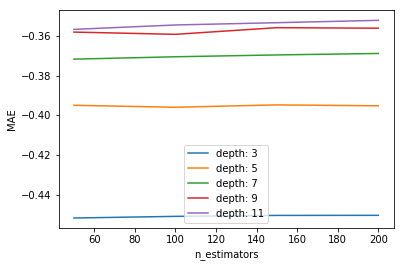

In [21]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot results
scores = np.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    plt.plot(n_estimators, scores[i], label='depth: ' + str(value))
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('MAE')

In [23]:
#fit best model
best_model = RandomForestRegressor(max_depth=11, n_estimators=200)

In [24]:
# training error of best model(MAPE)
best_model.fit(X_vote_average_train, y_vote_average_train)
y_vote_average_pred_train = best_model.predict(X_vote_average_train)
statistics.mean(abs((y_vote_average_pred_train-y_vote_average_train)/y_vote_average_train))

0.047167358162751825

In [25]:
# test error of best model(MAPE)
best_model.fit(X_vote_average_train, y_vote_average_train)
y_vote_average_pred = best_model.predict(X_vote_average_test)
statistics.mean(abs((y_vote_average_pred-y_vote_average_test)/y_vote_average_test))

0.08198795812608042